## Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

-----------------------

## Leitura do Dataset

In [13]:
df = pd.read_csv('../database/processed_dataset.csv')
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,lat,long,city_pop,job,dob,trans_num,unix_time,is_fraud
0,2019-01-01,2703186189652095,514,8,4.97,162,18,0,568,526,27,36.0788,-81.1781,3495,370,779,0b242abb623afc578575680df30655b9,1325376018,0
1,2019-01-01,630423337322,241,4,107.23,309,157,0,435,612,47,48.8878,-118.2105,149,428,607,1f76529f8574734946361c461b024d99,1325376044,0
2,2019-01-01,38859492057661,390,0,220.11,115,381,1,602,468,13,42.1808,-112.2620,4154,307,302,a1a22d70485983eac12b5b88dad1cf95,1325376051,0
3,2019-01-01,3534093764340240,360,2,45.00,163,463,1,930,84,26,46.2306,-112.1138,1939,328,397,6b849c168bdad6f867558c3793159a81,1325376076,0
4,2019-01-01,375534208663984,297,9,41.96,336,149,1,418,216,45,38.4207,-79.4629,99,116,734,a41d7549acf90789359a9aa5346dcb46,1325376186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21,30263540414123,499,0,15.56,121,332,1,154,330,44,37.7175,-112.4777,258,215,298,440b587732da4dc1a6395aba5fb41669,1371816728,0
1296671,2020-06-21,6011149206456997,2,1,51.70,160,463,1,856,813,20,39.2667,-77.5101,100,360,630,278000d2e0d2277d1de2f890067dcc0a,1371816739,0
1296672,2020-06-21,3514865930894695,599,1,105.93,74,67,1,158,346,32,32.9396,-105.8189,899,308,412,483f52fe67fabef353d552c1e662974c,1371816752,0
1296673,2020-06-21,2720012583106919,509,1,74.90,179,304,1,433,471,41,43.3526,-102.5411,1126,485,639,d667cdcbadaaed3da3f4020e83591c83,1371816816,0


----------------

## Análises Quantitativas

* Transações diárias:

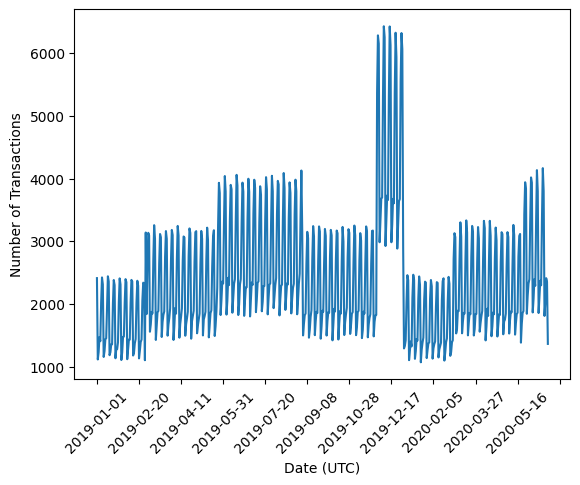

In [14]:
daily_tx = df.groupby(['trans_date_trans_time']).size().reset_index(name='count')

plt.plot(daily_tx['trans_date_trans_time'], daily_tx['count'])
plt.xlabel('Date (UTC)')
plt.ylabel('Number of Transactions')
plt.xticks([x for x in range(0,600,50)])
plt.tick_params(axis='x', labelrotation=45)

plt.show()

* Transações legais versus fraudes diárias:

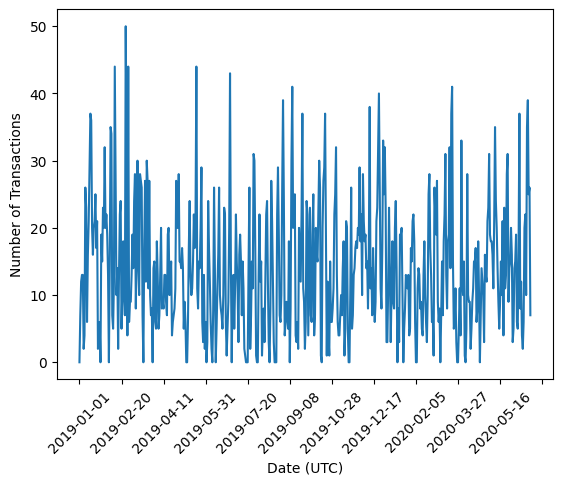

In [15]:
daily_wrong = df
daily_wrong = daily_wrong.groupby(['trans_date_trans_time'])['is_fraud'].sum().reset_index(name='count')

plt.plot(daily_wrong['trans_date_trans_time'], daily_wrong['count'])
plt.xlabel('Date (UTC)')
plt.ylabel('Number of Transactions')
plt.xticks([x for x in range(0,600,50)])
plt.tick_params(axis='x', labelrotation=45)

plt.show()

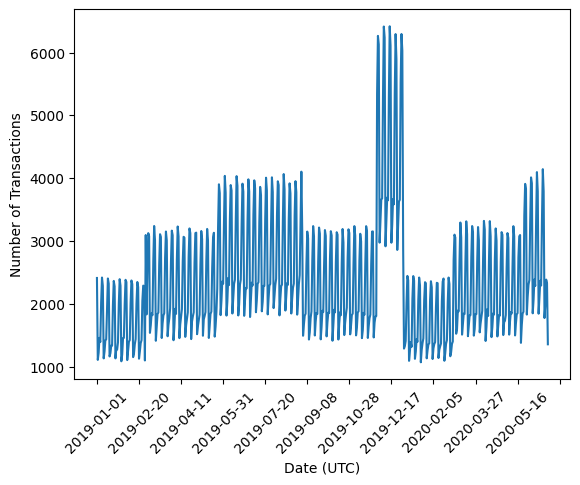

In [12]:
daily_right = df
daily_right['is_fraud'] = (~daily_right.is_fraud.astype(bool)).astype(int)
daily_right = daily_right.groupby(['trans_date_trans_time'])['is_fraud'].sum().reset_index(name='count')

plt.plot(daily_right['trans_date_trans_time'], daily_right['count'])
plt.xlabel('Date (UTC)')
plt.ylabel('Number of Transactions')
plt.xticks([x for x in range(0,600,50)])
plt.tick_params(axis='x', labelrotation=45)

plt.show()

* Transações mensais:

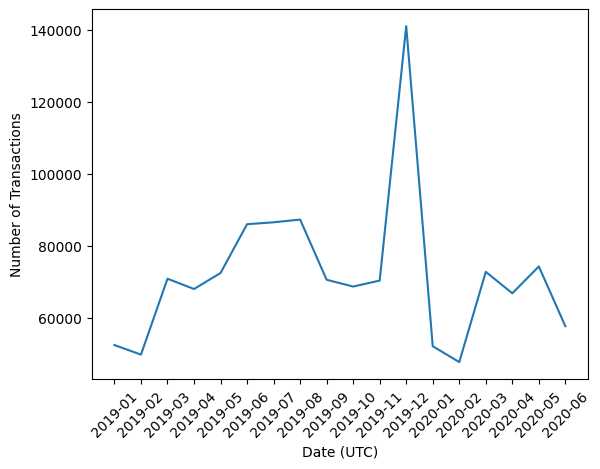

In [20]:
month_tx = df
month_tx['trans_date_trans_time'] = month_tx['trans_date_trans_time'].str[:7]
month_tx['trans_date_trans_time']

month_tx = df.groupby(['trans_date_trans_time']).size().reset_index(name='count')

plt.plot(month_tx['trans_date_trans_time'], month_tx['count'])
plt.xlabel('Date (UTC)')
plt.ylabel('Number of Transactions')
plt.tick_params(axis='x', labelrotation=45)

plt.show()

* Transações legais versus fraudes mensais:

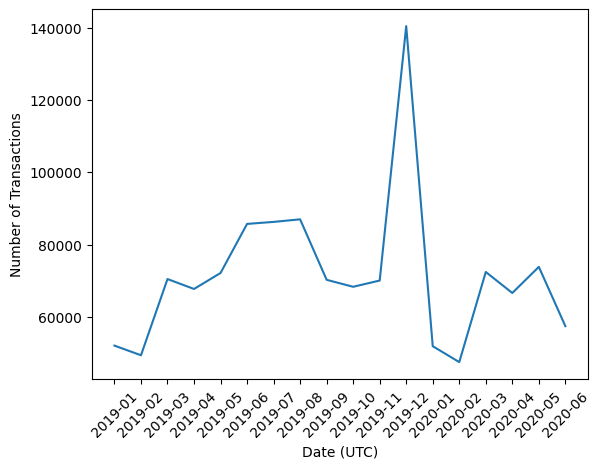

In [38]:
month_right = df
month_right = month_right[month_right['is_fraud'] == 0]
month_right['trans_date_trans_time'] = month_right['trans_date_trans_time'].str[:7]

month_right = month_right.groupby(['trans_date_trans_time']).size().reset_index(name='count')

plt.plot(month_right['trans_date_trans_time'], month_right['count'])
plt.xlabel('Date (UTC)')
plt.ylabel('Number of Transactions')
plt.tick_params(axis='x', labelrotation=45)


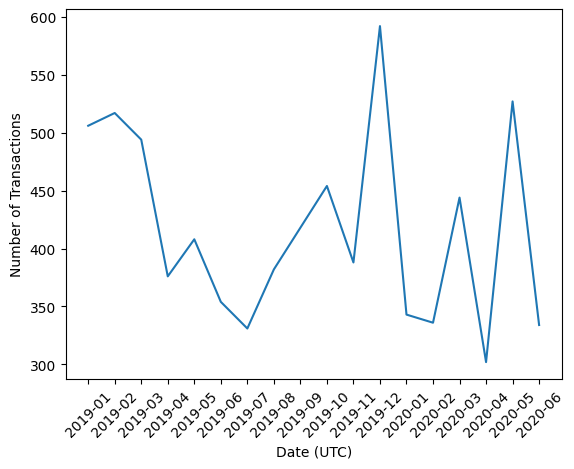

In [37]:
month_wrong = df
month_wrong = month_wrong[month_wrong['is_fraud'] == 1]
month_wrong['trans_date_trans_time'] = month_wrong['trans_date_trans_time'].str[:7]

month_wrong = month_wrong.groupby(['trans_date_trans_time']).size().reset_index(name='count')

plt.plot(month_wrong['trans_date_trans_time'], month_wrong['count'])
plt.xlabel('Date (UTC)')
plt.ylabel('Number of Transactions')
plt.tick_params(axis='x', labelrotation=45)